In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa
from pandas import datetime

In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

CPI = pd.read_csv('CIP.csv', parse_dates=[0], date_parser = parser, index_col = 0)
CPI.head()

,CPI Change
observation_date,
1963-01-01,1.21
1964-01-01,1.31
1965-01-01,1.67
1966-01-01,2.99
1967-01-01,2.78


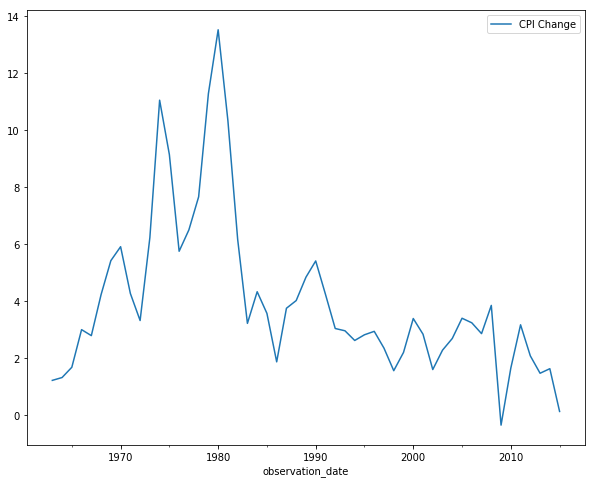

In [3]:
CPI.plot(figsize = (10, 8))

## Checking for stationarity 

In [4]:
from statsmodels.graphics.tsaplots import plot_acf 


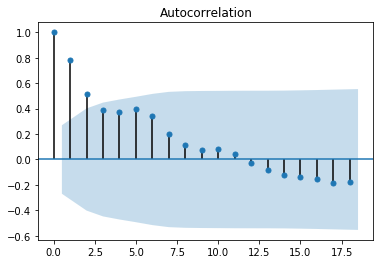

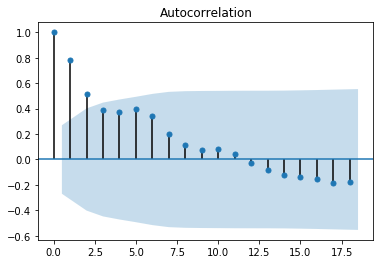

In [5]:
plot_acf(CPI)

In [6]:
CPI_diff3 = CPI.diff(periods=3)
CPI_diff7 = CPI.diff(periods=7)

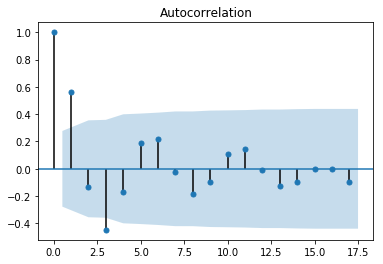

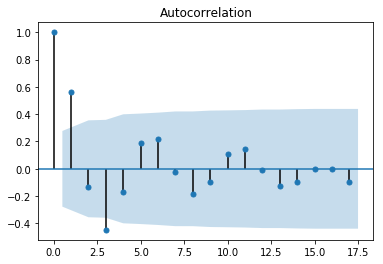

In [7]:
CPI_diff3 = CPI_diff3[3:]
plot_acf(CPI_diff3)

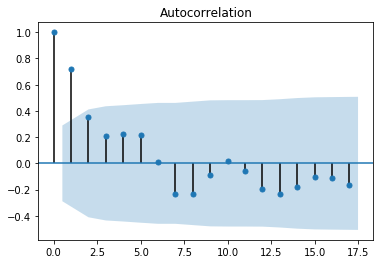

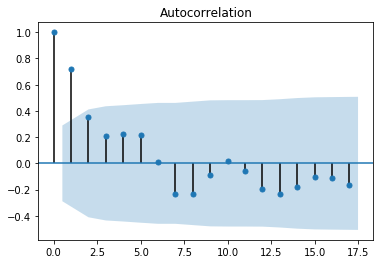

In [8]:
CPI_diff7 = CPI_diff7[7:]
plot_acf(CPI_diff7)

In [9]:
X = CPI.values
X.size

53

In [78]:
X3 = CPI_diff3.values
train3 = X3[0:34]
test3 = X3[34:50]

In [79]:
X3.size

50

In [80]:
train3.size

34

In [81]:
test3.size

16

In [203]:
X7 = CPI_diff7.values
train7 = X7[0:30]
test7 = X7[30:]

In [204]:
X7.size

46

In [205]:
train7.size

30

In [206]:
test7.size

16

In [207]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [208]:
model_ar3 = AR(train3)
model_ar3_fit = model_ar3.fit()
predictions3 = model_ar3_fit.predict(start=34, end=49)

In [214]:
model_ar7 = AR(train7)
model_ar7_fit = model_ar7.fit()
predictions7 = model_ar7_fit.predict(start = 30, end= 45)

### RMSE of three term MA

In [215]:
from math import sqrt
mse_cpi = mean_squared_error(test3, predictions3)
RMSE_cpi = print(sqrt(mse_cpi))

1.4117467141342332


### RMSE of seven term MA

In [216]:
mse7_cpi = mean_squared_error(test7, predictions7)
RMSE_7_cpi = print(sqrt(mse7_cpi))

1.8068528664247205


### MAE of the three MA

In [218]:
MAE_cpi = mean_absolute_error(test3, predictions3)
print(MAE_cpi)

1.13220808668311


### MAE of the seven term MA

In [220]:
MAE_cpi7 = mean_absolute_error(test7, predictions7)
print(MAE_cpi7)

1.3746661209288706


In [ ]:


plt.figure(figsize = (12, 8))
plt.plot(predictions3, color = 'orange')
plt.plot(predictions7, color = 'red')

plt.legend(predictions3, predictions7)
import warnings
warnings.filterwarnings('ignore')